In [2]:
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [3]:
df = pd.read_csv('/Users/Hanya/Documents/neo_price.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,137.95,142.01,127.86,128.36,"239,238,000","8,966,490,000"
2018-02-19,127.23,138.52,126.70,137.47,"201,551,000","8,270,290,000"
2018-02-18,136.40,137.95,124.32,127.38,"207,624,000","8,866,100,000"
2018-02-17,131.03,139.80,129.42,136.75,"286,385,000","8,516,620,000"
2018-02-16,123.02,130.62,119.94,128.85,"194,878,000","7,996,380,000"


In [5]:
df.index

DatetimeIndex(['2018-02-20', '2018-02-19', '2018-02-18', '2018-02-17',
               '2018-02-16', '2018-02-15', '2018-02-14', '2018-02-13',
               '2018-02-12', '2018-02-11',
               ...
               '2016-09-18', '2016-09-17', '2016-09-16', '2016-09-15',
               '2016-09-14', '2016-09-13', '2016-09-12', '2016-09-11',
               '2016-09-10', '2016-09-09'],
              dtype='datetime64[ns]', name='Date', length=530, freq=None)

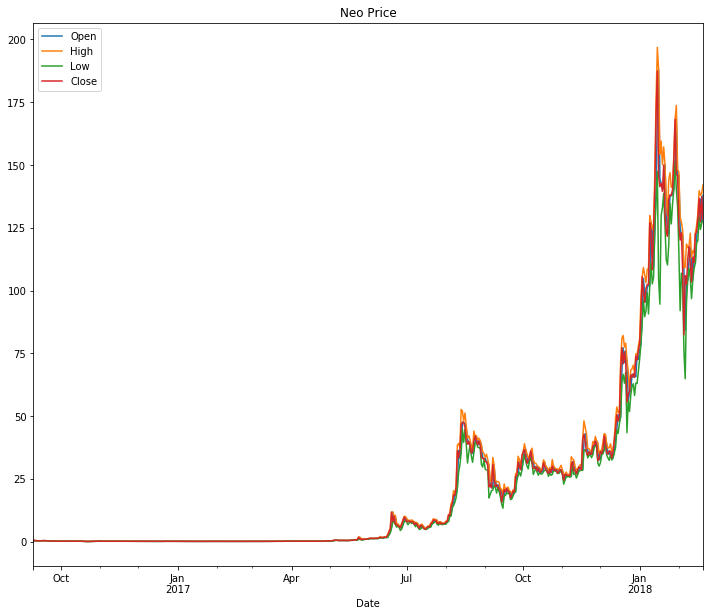

In [6]:
df.plot(figsize=(12,10),title='Neo Price')

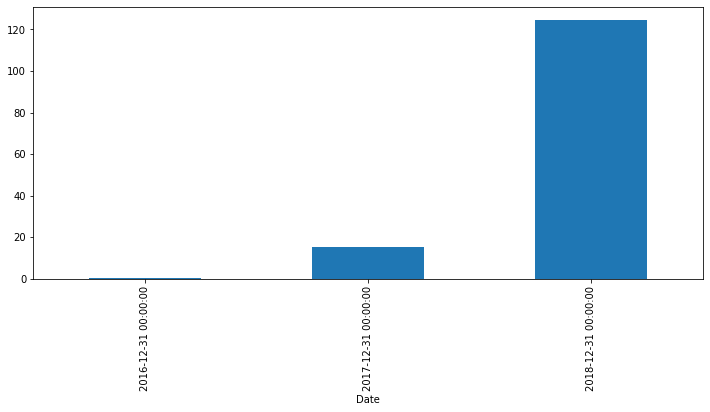

In [7]:
df['Close'].resample('Y').mean().plot.bar(figsize=(12,5))

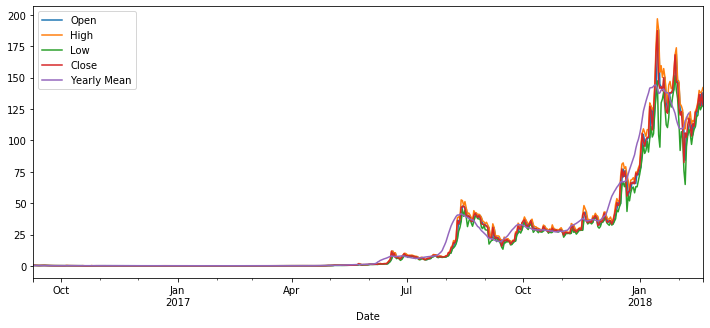

In [8]:
df['Yearly Mean']=df['Close'].rolling(window=12).mean()
df.plot(figsize=(12,5))

### Augmented Dickey Fuller Test 1 

In [9]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5495603936950116, True)

### Augmented Dickey Fuller Test 2

In [10]:
from statsmodels.tsa.stattools import adfuller
series_litecoin = df['Close'].values
result = adfuller(series_litecoin, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key,value in result[4].items():
      print('Critical Values: ')
      print(f'{key},{value}')

ADF Statistic: -3.281948344076013
n_lags: 0.015704920913655555
p-value: 0.015704920913655555
Critical Values: 
1%,-3.4432372923913124
Critical Values: 
5%,-2.86722383510113
Critical Values: 
10%,-2.5697972702806613


Given that the dataset exhibits a p-value lower than the 5% significance level, the null hypothesis can be rejected and conclude stationarity

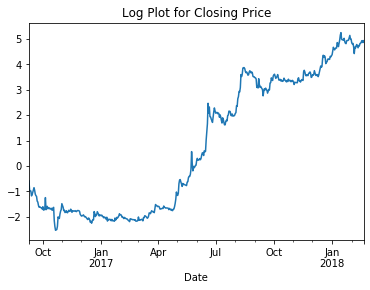

In [11]:
lnclose=np.log(df['Close'])
lnclose
lnclose.plot(title='Log Plot for Closing Price')
#adjusting for volatility

In [13]:
ln_list = lnclose.to_list()

In [14]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

C:\Users\Hanya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5495603936950116, True)

In [15]:
from statsmodels.tsa.stattools import acf,pacf
import pandas as pd

### Augmented Dickey Fuller Test Post Differencing 

C:\Users\Hanya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


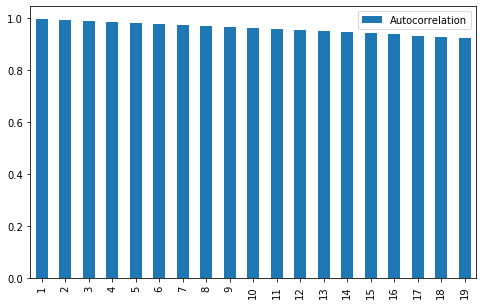

In [16]:
acf_1 = acf(lnclose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Gentle decrease downwards for each lag

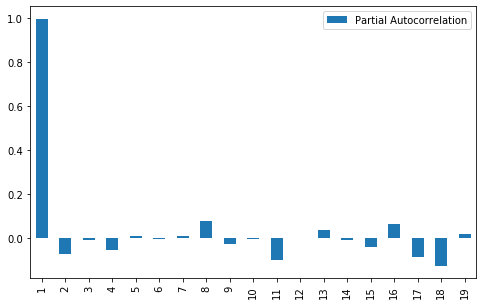

In [17]:
pacf_1 = pacf(lnclose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Sudden decrease downwards between first and subsequent lags suggesting we have a stationary AR1 time series

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Neo Coin Integrated by order of 1')

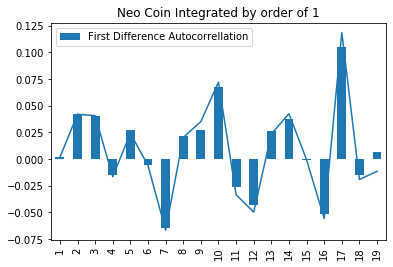

In [19]:
lnclose_diff=lnclose-lnclose.shift()
diff=lnclose_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrellation']
test_df.index +=1
test_df.plot.bar()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.title('Neo Coin Integrated by order of 1')
#Integrated order of 1

In [20]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(lnclose)

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.99, True)

In [21]:
import matplotlib.pyplot as plt

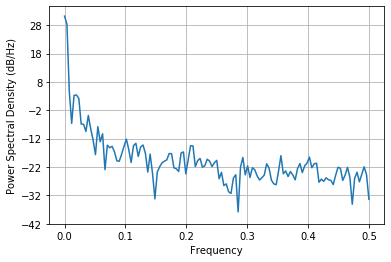

In [26]:
from spectrum import *
psd = WelchPeriodogram(ln_list, 256)

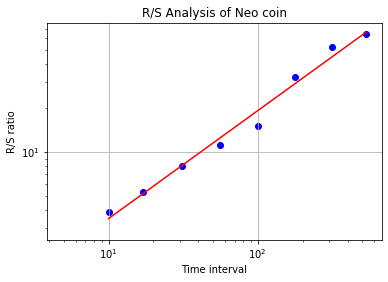

H=0.7400


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

series = ln_list

H, c, data = compute_Hc(series, simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="red")
ax.scatter(data[0], data[1], color="blue")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.title('R/S Analysis of Neo coin')
plt.show()

print("H={:.4f}".format(H,c))

In [30]:
import nolds

In [41]:
h = nolds.dfa(ln_list)

In [42]:
h

0.6205677193804393

In [47]:
print ('        #### Hurst Calculation Results for Litecoin #####    ')
print ('============================================================')
print ('  DFA Hurst Parameter Calculation : ',h)
print ('  R/S Analysis Hurst  Calculation : ',H)

        #### Hurst Calculation Results for Litecoin #####    
  DFA Hurst Parameter Calculation :  0.6205677193804393
  R/S Analysis Hurst  Calculation :  0.7400125570475713
